In [1]:
import numpy as np
import tensorflow as tf

In [3]:
text = [
        'Quispe fundó el Movimiento Indígena Tupak Katari en 1979 y el Ejército Guerrillero Tupak Katari en 1990. Su nombre honorífico, Mallku, hace referencia al espíritu de las montañas que rodean y protegen al Pueblo, y por tanto es la fuente de vida. "Mallku" significa "pico" tanto en geografía como en jerarquía',
       'Quispe era un acérrimo oponente del neoliberal de consenso Washington , y también estaba enérgicamente en contra de los esquemas liderados por Estados Unidos para la erradicación de la coca , que él considera que destruye una parte crítica de la cultura aymara. Estuvo muy involucrado en la Guerra del Gas de Bolivia.',
       'Quispe realizó una campaña fallida en las elecciones presidenciales de 2005 , que vieron la victoria del indígena Evo Morales , líder del MAS (Movimiento al socialismo). Quispe fue un crítico vocal del gobierno de Morales, y lo caracterizó como un representante del "neoliberalismo con rostro indio"',
       'En 1984, fue uno de los principales organizadores del Ejército Guerrillero Tupac Katari, una insurrección armada fallida contra el gobierno. Quispe fue arrestado por su participación en el movimiento el 19 de agosto de 1992.',
       'Quispe ha trabajado para el establecimiento de una república Tawantinsuyu - que tomaría el nombre de " Collasuyu " - en las aymara regiones de mayoría de Bolivia. ',
        'Quispe falleció el 19 de enero de 2021 en El Alto por un paro cardíaco . '
       ]

In [29]:
token = tf.keras.preprocessing.text.Tokenizer(oov_token="<OVV>")

In [30]:
cadena = ''
for i in text:
    cadena += i +"\n"

In [31]:
corpus = cadena.lower().split('\n')

In [32]:
corpus[0]

'quispe fundó el movimiento indígena tupak katari en 1979 y el ejército guerrillero tupak katari en 1990. su nombre honorífico, mallku, hace referencia al espíritu de las montañas que rodean y protegen al pueblo, y por tanto es la fuente de vida. "mallku" significa "pico" tanto en geografía como en jerarquía'

In [33]:
token.fit_on_texts(corpus)

In [34]:
total_words = len(token.word_index) + 1

In [35]:
print(token.word_index); print(total_words)

{'<OVV>': 1, 'de': 2, 'en': 3, 'el': 4, 'quispe': 5, 'del': 6, 'la': 7, 'y': 8, 'que': 9, 'por': 10, 'un': 11, 'una': 12, 'movimiento': 13, 'katari': 14, 'al': 15, 'las': 16, 'fue': 17, 'indígena': 18, 'tupak': 19, 'ejército': 20, 'guerrillero': 21, 'su': 22, 'nombre': 23, 'mallku': 24, 'tanto': 25, 'como': 26, 'contra': 27, 'los': 28, 'para': 29, 'aymara': 30, 'bolivia': 31, 'fallida': 32, 'morales': 33, 'gobierno': 34, '19': 35, 'fundó': 36, '1979': 37, '1990': 38, 'honorífico': 39, 'hace': 40, 'referencia': 41, 'espíritu': 42, 'montañas': 43, 'rodean': 44, 'protegen': 45, 'pueblo': 46, 'es': 47, 'fuente': 48, 'vida': 49, 'significa': 50, 'pico': 51, 'geografía': 52, 'jerarquía': 53, 'era': 54, 'acérrimo': 55, 'oponente': 56, 'neoliberal': 57, 'consenso': 58, 'washington': 59, 'también': 60, 'estaba': 61, 'enérgicamente': 62, 'esquemas': 63, 'liderados': 64, 'estados': 65, 'unidos': 66, 'erradicación': 67, 'coca': 68, 'él': 69, 'considera': 70, 'destruye': 71, 'parte': 72, 'crítica':

In [67]:
input_sequences = []

for i in corpus:
    token_list = token.texts_to_sequences([i])[0]
    #print(token_list)
    # Tokenizamos las palabras
    for j in range(1, len(token_list)):
        # aca agremamos palabras por palabras para que el algoritmo aprenda a predecir la sig palabra
        n_gram_sequence = token_list[:j+1]
        #print(n_gram_sequence)
        input_sequences.append(n_gram_sequence)

In [71]:
max_sequence = max([len(i) for i in input_sequences])

In [75]:
input_padd = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence, padding='pre'))

In [83]:
input_padd[:,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
xs, labels = input_padd[:,:-1], input_padd[:,-1]

In [102]:
xs[1,:], labels[1]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 36]),
 4)

In [104]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [108]:
ys[1,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [112]:
print(token.word_index['mallku'])
print(token.word_index['bolivia'])
print(token.word_index['enero'])

24
31
121


In [117]:
xs[6], ys[6]

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 36,  4, 13, 18, 19, 14]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [122]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))

In [136]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9, nesterov=True), metrics=['accuracy'])

In [137]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 104ms/step - loss: 0.0367 - accuracy: 0.9886
Epoch 2/100
7/7 [==============================] - 1s 106ms/step - loss: 0.0283 - accuracy: 0.9852
Epoch 3/100
7/7 [==============================] - 1s 101ms/step - loss: 0.0320 - accuracy: 0.9829
Epoch 4/100
7/7 [==============================] - 1s 101ms/step - loss: 0.0408 - accuracy: 0.9862
Epoch 5/100
7/7 [==============================] - 1s 105ms/step - loss: 0.0400 - accuracy: 0.9795
Epoch 6/100
7/7 [==============================] - 1s 101ms/step - loss: 0.0352 - accuracy: 0.9896
Epoch 7/100
7/7 [==============================] - 1s 102ms/step - loss: 0.0489 - accuracy: 0.9731
Epoch 8/100
7/7 [==============================] - 1s 119ms/step - loss: 0.0248 - accuracy: 0.9886
Epoch 9/100
7/7 [==============================] - 1s 109ms/step - loss: 0.0407 - accuracy: 0.9795
Epoch 10/100
7/7 [==============================] - 1s 108ms/step - loss: 0.0237 - accuracy: 0.9877
Epoch 11/

In [141]:
import matplotlib.pyplot as plt

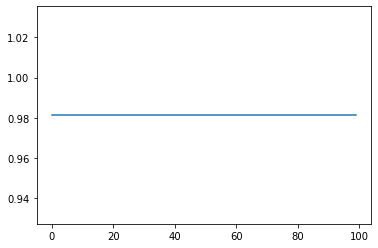

In [145]:
plt.plot(history.history['accuracy'])

In [154]:
seed_text = 'el mallku murio en '
next_word =50

for _ in range(next_word):
    token_list = token.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence-1, padding='pre')
    predict = model.predict_classes(token_list, verbose=0)
    output_word = ''
    
    for word, index in token.word_index.items():
        if index == predict:
            output_word = word
            break
            
    seed_text += ":"+ output_word
    
print(seed_text)

el mallku murio en :las:elecciones:de:consenso:washington:y:también:estaba:enérgicamente:en:contra:de:los:esquemas:liderados:por:estados:unidos:para:la:erradicación:de:la:coca:que:él:considera:que:destruye:una:parte:crítica:de:la:cultura:aymara:estuvo:muy:involucrado:en:la:guerra:del:gas:de:bolivia:bolivia:bolivia:bolivia:tanto
